In [1]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier, Pool #sklearn에서 불러오는게 아님, catboost
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
data = pd.read_csv(url)

In [3]:
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [4]:
print(data.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [ ]:
# 미실행
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [ ]:
data.info()

In [15]:
print(data.isna().any())
print(data.isna().sum())

Survived                   False
Pclass                     False
Name                       False
Sex                        False
Age                        False
Siblings/Spouses Aboard    False
Parents/Children Aboard    False
Fare                       False
dtype: bool
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [16]:
# 사용 가능한 특성을 확인
available_features = ['Pclass','Sex','Age','Fare','Siblings/Spouses Aboard','Parents/Children Aboard' ]
cat_features = ['Pclass','Sex'] # 모델에 범주형을 알려줘야함, 따로 전처리(원핫,레이블)는 필요없음

In [17]:
X = data[available_features]
y = data['Survived']

In [18]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cat_model = CatBoostClassifier(random_seed=42, verbose=False)

In [19]:
# 그리드 서치

param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.3],
    'iterations': [100, 20],
    'l2_leaf_reg': [1, 3, 5]}

In [20]:
# 모델 훈련
grid_search = GridSearchCV(estimator = cat_model , param_grid=param_grid , cv = 5 , scoring= 'accuracy')
grid_search.fit(X_train, y_train,cat_features = cat_features)
best_model = grid_search.best_estimator_

In [21]:
# 모델 예측
y_pred = best_model.predict(X_test)

In [22]:
# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       111
           1       0.79      0.61      0.69        67

    accuracy                           0.79       178
   macro avg       0.79      0.76      0.77       178
weighted avg       0.79      0.79      0.79       178



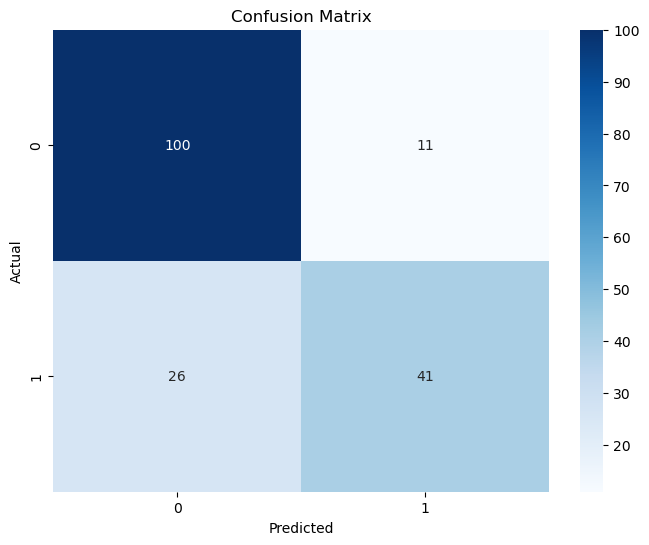

In [23]:
# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

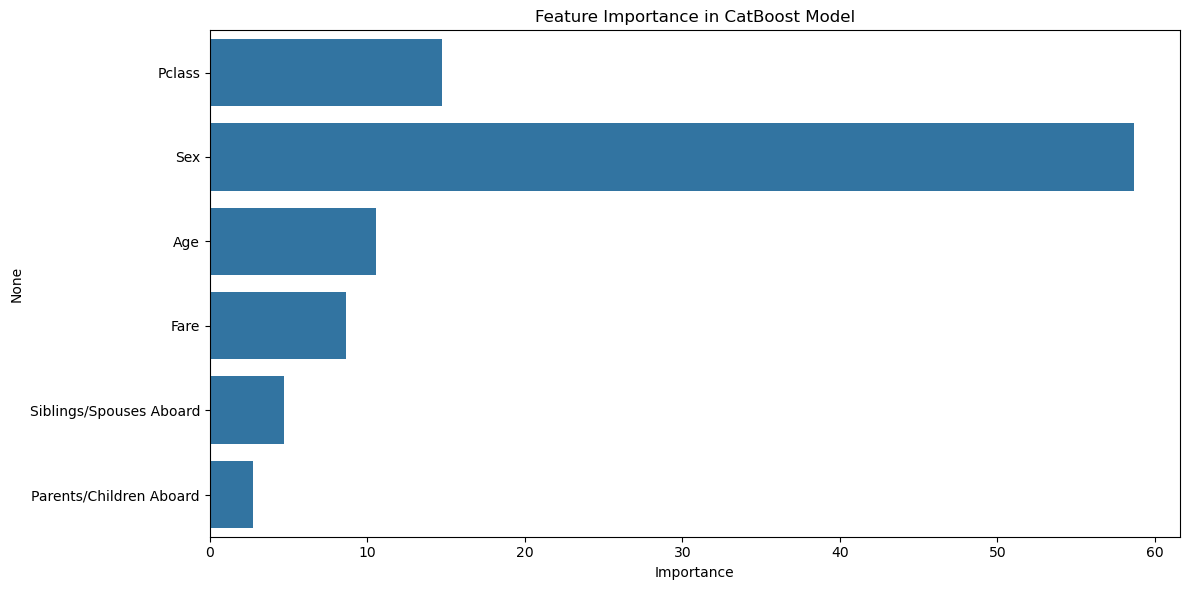

In [24]:
# 특성 중요도 시각화
feature_importance = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance in CatBoost Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()